In [1]:
import graphlab
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
from sklearn.model_selection import train_test_split
%matplotlib inline 

This non-commercial license of GraphLab Create for academic use is assigned to aamir0744@gmail.com and will expire on June 08, 2018.


[INFO] graphlab.cython.cy_server: GraphLab Create v2.1 started. Logging: /tmp/graphlab_server_1497324789.log


In [2]:
df_jokes = pd.read_table('data/jokes.dat', names=['jokes'])
df_ratings_all = pd.read_table('data/ratings.dat')

In [74]:
df_jokes.head(10)  
#jokes came in a messy format. I will have to extract the text using good ol' python and maybe Beautiful Soup

,jokes
0,1:
1,<p>
2,"A man visits the doctor. The doctor says, &quo..."
3,<br />
4,"The man replies, &quot;Well, thank God I don&#..."
5,</p>
6,2:
7,<p>
8,This couple had an excellent relationship goin...
9,<br />


In [55]:
df_ratings_all.head()

,user_id,joke_id,rating
0,34888,111,-9.71875
1,49651,119,4.75000
2,29027,137,2.62500
3,25235,30,-2.43750
4,50499,19,2.18750


In [4]:
df_train, df_test = train_test_split(df_ratings_all, test_size=0.1)

In [5]:
df_train.shape

(1096492, 3)

In [6]:
df_test.shape

(121833, 3)

In [9]:
df_jokes.tail(10)

,jokes
1267,150:
1268,<p>
1269,"In an interview with David Letterman, Carter p..."
1270,<br />
1271,"He told the joke, then waited for the translat..."
1272,<br />
1273,"After the speech, Carter wanted to meet the tr..."
1274,<br />
1275,When Carter asked how the joke had been told i...
1276,</p>


In [13]:
'''this code will collect each of the 150 jokes in df_jokes['jokes'], clean it up using Beautiful soup and
make a new list of jokes where the index will correspond to the joke_id minus 1''' 

i = 1   
jokes = []
joke = []
for line in df_jokes['jokes'].values:
    if str(i) + ':' == line:
        i += 1
        soup = BeautifulSoup(''.join(joke), 'html.parser')
        jokes.append(soup.text)
        joke = []
    else:
        joke.append(line)
        
jokes.append(joke)  
jokes = jokes[1:]

In [56]:
len(jokes)  # joke_ids range from 1 to 151 so in this case index+1 will give the joke_id

150

In [75]:
print jokes[0],  #just checking the format. Looks like Beautiful Soup did well
print '\n'
print jokes[1]

A man visits the doctor. The doctor says, "I have bad news for you. You have cancer and Alzheimer's disease".The man replies, "Well, thank God I don't have cancer!" 

This couple had an excellent relationship going until one day he came home from work to find his girlfriend packing. He asked her why she was leaving him and she told him that she had heard awful things about him. "What could they possibly have said to make you move out?""They told me that you were a pedophile."He replied, "That's an awfully big word for a ten year old."


In [61]:
sf = graphlab.SFrame(df_train)  # graphlab.recommender only accepts SFrame

In [19]:
lmbdas = [0, 1e-16, 1e-14, 1e-12, 1e-10]   #trying different learning rates

In [ ]:
rmses = []
for lmbda in lmbdas:
    rating_recommender = graphlab.recommender.factorization_recommender.create(sf, user_id = 'user_id', item_id = 'joke_id', target = 'rating', solver = 'als', regularization = lmbda)
    rmses.append(rating_recommender.get('training_rmse'))
rmses

*Found best lambda to be 1e-14 but the difference was marginal*

In [64]:
rating_recommender = graphlab.recommender.factorization_recommender.create(sf, user_id = 'user_id', item_id = 'joke_id', target = 'rating', solver = 'als', regularization=1e-14)


Recsys training: model = factorization_recommender

Preparing data set.

Data has 1096492 observations with 50690 users and 141 items.

Data prepared in: 1.42618s

Training factorization_recommender for recommendations.

+------------------------------+--------------------------------------------------+----------+

| Parameter                    | Description                                      | Value    |

+------------------------------+--------------------------------------------------+----------+

| num_factors                  | Factor Dimension                                 | 8        |

| regularization               | L2 Regularization on Factors                     | 1e-14    |

| max_iterations               | Maximum Number of Iterations                     | 50       |

| solver                       | Solver used for training                         | als      |

+------------------------------+--------------------------------------------------+----------+

+---------+--------------+------------------------+

| Iter.   | Elapsed time | RMSE                   |

+---------+--------------+------------------------+

| Initial | 74us         | NA                     |

+---------+--------------+------------------------+

| 0       | 727.341ms    | 3.86516                |

| 1       | 1.34s        | 3.27442                |

| 2       | 1.95s        | 3.14933                |

| 3       | 2.41s        | 3.10016                |

| 4       | 2.87s        | 3.06977                |

| 5       | 3.50s        | 3.04641                |

| 6       | 4.17s        | 3.02637                |

| 7       | 4.85s        | 3.00899                |

| 8       | 5.40s        | 2.99476                |

| 9       | 5.88s        | 2.98366                |

| 10      | 6.33s        | 2.97509                |

| 11      | 7.05s        | 2.96843                |

| 12      | 7.76s        | 2.96317                |

| 13      | 8.40s        | 2.95894                |

| 14      | 9.04s        | 2.95547                |

| 15      | 9.70s        | 2.95255                |

| 16      | 10.27s       | 2.95006                |

| 17      | 10.89s       | 2.94789                |

| 18      | 11.38s       | 2.94597                |

| 19      | 12.04s       | 2.94427                |

| 20      | 12.55s       | 2.94274                |

| 21      | 13.03s       | 2.94137                |

| 22      | 13.49s       | 2.94013                |

| 23      | 13.95s       | 2.939                  |

| 24      | 14.43s       | 2.93796                |

| 25      | 14.90s       | 2.937                  |

| 26      | 15.38s       | 2.93612                |

| 27      | 15.88s       | 2.93529                |

| 28      | 16.37s       | 2.93452                |

| 29      | 16.85s       | 2.9338                 |

| 30      | 17.35s       | 2.93313                |

| 31      | 17.82s       | 2.9325                 |

| 32      | 18.28s       | 2.9319                 |

| 33      | 18.74s       | 2.93133                |

| 34      | 19.20s       | 2.9308                 |

| 35      | 19.67s       | 2.93029                |

| 36      | 20.15s       | 2.92981                |

| 37      | 20.63s       | 2.92935                |

| 38      | 21.13s       | 2.92891                |

| 39      | 21.64s       | 2.9285                 |

| 40      | 22.10s       | 2.9281                 |

| 41      | 22.59s       | 2.92771                |

| 42      | 23.07s       | 2.92734                |

| 43      | 23.54s       | 2.92698                |

| 44      | 24.02s       | 2.92664                |

| 45      | 24.51s       | 2.92631                |

| 46      | 24.98s       | 2.92599                |

| 47      | 25.44s       | 2.92567                |

| 48      | 25.92s       | 2.92537                |

| 49      | 26.43s       | 2.92508                |

| FINAL   | 26.43s       | 2.92508                |

+---------+--------------+------------------------+

Optimization Complete: Iteration limit reached.

### Let's do a little grid search for values of k upto n. This is for a (m x n) input matrix. ###

In [27]:
df_train['joke_id'].unique().shape

(141,)

In [30]:
k_rmses = {}
for k in xrange(1,141,7):
    k_recommender = graphlab.recommender.factorization_recommender.create(sf, num_factors=k, user_id = 'user_id', item_id = 'joke_id', target = 'rating', solver = 'als', regularization=1e-14)
    k_rmses[k] = k_recommender.get('training_rmse')

Recsys training: model = factorization_recommender

Preparing data set.

Data has 1096492 observations with 50690 users and 141 items.

Data prepared in: 1.04675s

Training factorization_recommender for recommendations.

+------------------------------+--------------------------------------------------+----------+

| Parameter                    | Description                                      | Value    |

+------------------------------+--------------------------------------------------+----------+

| num_factors                  | Factor Dimension                                 | 1        |

| regularization               | L2 Regularization on Factors                     | 1e-14    |

| max_iterations               | Maximum Number of Iterations                     | 50       |

| solver                       | Solver used for training                         | als      |

+------------------------------+--------------------------------------------------+----------+

+---------+--------------+------------------------+

| Iter.   | Elapsed time | RMSE                   |

+---------+--------------+------------------------+

| Initial | 103us        | NA                     |

+---------+--------------+------------------------+

| 0       | 326.535ms    | 5.0584                 |

| 1       | 628.793ms    | 4.4626                 |

| 2       | 928.288ms    | 4.31908                |

| 3       | 1.23s        | 4.28932                |

| 4       | 1.54s        | 4.28543                |

| 5       | 1.84s        | 4.28477                |

| 6       | 2.13s        | 4.28474                |

| 7       | 2.41s        | 4.28483                |

| 8       | 2.70s        | 4.28491                |

| 9       | 3.01s        | 4.28496                |

| 10      | 3.31s        | 4.28499                |

| 11      | 3.62s        | 4.285                  |

| 12      | 3.91s        | 4.28499                |

| 13      | 4.32s        | 4.28498                |

| 14      | 4.61s        | 4.28497                |

| 15      | 4.90s        | 4.28495                |

| 16      | 5.19s        | 4.28493                |

| 17      | 5.48s        | 4.28492                |

| 18      | 5.77s        | 4.2849                 |

| 19      | 6.15s        | 4.28488                |

| 20      | 6.46s        | 4.28486                |

| 21      | 6.75s        | 4.28485                |

| 22      | 7.05s        | 4.28483                |

| 23      | 7.34s        | 4.28482                |

| 24      | 7.63s        | 4.2848                 |

| 25      | 7.92s        | 4.28479                |

| 26      | 8.21s        | 4.28478                |

| 27      | 8.55s        | 4.28477                |

| 28      | 8.89s        | 4.28475                |

| 29      | 9.18s        | 4.28474                |

| 30      | 9.50s        | 4.28473                |

| 31      | 9.78s        | 4.28472                |

| 32      | 10.07s       | 4.28471                |

| 33      | 10.42s       | 4.2847                 |

| 34      | 10.71s       | 4.2847                 |

| 35      | 11.01s       | 4.28469                |

| 36      | 11.45s       | 4.28468                |

| 37      | 11.85s       | 4.28467                |

| 38      | 12.15s       | 4.28467                |

| 39      | 12.43s       | 4.28466                |

| 40      | 12.72s       | 4.28465                |

| 41      | 13.02s       | 4.28465                |

| 42      | 13.33s       | 4.28464                |

| 43      | 13.62s       | 4.28463                |

| 44      | 13.91s       | 4.28463                |

| 45      | 14.20s       | 4.28462                |

| 46      | 14.53s       | 4.28462                |

| 47      | 14.82s       | 4.28461                |

| 48      | 15.11s       | 4.28461                |

| 49      | 15.41s       | 4.2846                 |

| FINAL   | 15.41s       | 4.2846                 |

+---------+--------------+------------------------+

Optimization Complete: Iteration limit reached.

Recsys training: model = factorization_recommender

Preparing data set.

Data has 1096492 observations with 50690 users and 141 items.

Data prepared in: 1.08324s

Training factorization_recommender for recommendations.

+------------------------------+--------------------------------------------------+----------+

| Parameter                    | Description                                      | Value    |

+------------------------------+--------------------------------------------------+----------+

| num_factors                  | Factor Dimension                                 | 8        |

| regularization               | L2 Regularization on Factors                     | 1e-14    |

| max_iterations               | Maximum Number of Iterations                     | 50       |

| solver                       | Solver used for training                         | als      |

+------------------------------+--------------------------------------------------+----------+

+---------+--------------+------------------------+

| Iter.   | Elapsed time | RMSE                   |

+---------+--------------+------------------------+

| Initial | 81us         | NA                     |

+---------+--------------+------------------------+

| 0       | 477.815ms    | 3.86516                |

| 1       | 940.89ms     | 3.27442                |

| 2       | 1.41s        | 3.14933                |

| 3       | 1.97s        | 3.10016                |

| 4       | 2.42s        | 3.06977                |

| 5       | 2.87s        | 3.04641                |

| 6       | 3.33s        | 3.02637                |

| 7       | 3.78s        | 3.00899                |

| 8       | 4.23s        | 2.99476                |

| 9       | 4.67s        | 2.98366                |

| 10      | 5.12s        | 2.97509                |

| 11      | 5.56s        | 2.96843                |

| 12      | 6.00s        | 2.96317                |

| 13      | 6.45s        | 2.95894                |

| 14      | 6.89s        | 2.95547                |

| 15      | 7.32s        | 2.95255                |

| 16      | 7.75s        | 2.95006                |

| 17      | 8.20s        | 2.94789                |

| 18      | 8.64s        | 2.94597                |

| 19      | 9.08s        | 2.94427                |

| 20      | 9.51s        | 2.94274                |

| 21      | 9.95s        | 2.94137                |

| 22      | 10.38s       | 2.94013                |

| 23      | 10.82s       | 2.939                  |

| 24      | 11.27s       | 2.93796                |

| 25      | 11.71s       | 2.937                  |

| 26      | 12.15s       | 2.93612                |

| 27      | 12.60s       | 2.93529                |

| 28      | 13.03s       | 2.93452                |

| 29      | 13.47s       | 2.9338                 |

| 30      | 13.92s       | 2.93313                |

| 31      | 14.36s       | 2.9325                 |

| 32      | 14.79s       | 2.9319                 |

| 33      | 15.28s       | 2.93133                |

| 34      | 15.72s       | 2.9308                 |

| 35      | 16.15s       | 2.93029                |

| 36      | 16.60s       | 2.92981                |

| 37      | 17.04s       | 2.92935                |

| 38      | 17.49s       | 2.92891                |

| 39      | 17.93s       | 2.9285                 |

| 40      | 18.36s       | 2.92809                |

| 41      | 18.81s       | 2.92771                |

| 42      | 19.26s       | 2.92734                |

| 43      | 19.70s       | 2.92698                |

| 44      | 20.16s       | 2.92664                |

| 45      | 20.65s       | 2.92631                |

| 46      | 21.13s       | 2.92599                |

| 47      | 21.60s       | 2.92567                |

| 48      | 22.09s       | 2.92537                |

| 49      | 22.58s       | 2.92508                |

| FINAL   | 22.58s       | 2.92508                |

+---------+--------------+------------------------+

Optimization Complete: Iteration limit reached.

Recsys training: model = factorization_recommender

Preparing data set.

Data has 1096492 observations with 50690 users and 141 items.

Data prepared in: 1.01162s

Training factorization_recommender for recommendations.

+------------------------------+--------------------------------------------------+----------+

| Parameter                    | Description                                      | Value    |

+------------------------------+--------------------------------------------------+----------+

| num_factors                  | Factor Dimension                                 | 15       |

| regularization               | L2 Regularization on Factors                     | 1e-14    |

| max_iterations               | Maximum Number of Iterations                     | 50       |

| solver                       | Solver used for training                         | als      |

+------------------------------+--------------------------------------------------+----------+

+---------+--------------+------------------------+

| Iter.   | Elapsed time | RMSE                   |

+---------+--------------+------------------------+

| Initial | 90us         | NA                     |

+---------+--------------+------------------------+

| 0       | 856.608ms    | 3.46722                |

| 1       | 1.69s        | 2.78148                |

| 2       | 2.53s        | 2.66008                |

| 3       | 3.36s        | 2.59907                |

| 4       | 4.22s        | 2.5601                 |

| 5       | 5.12s        | 2.53308                |

| 6       | 5.95s        | 2.51326                |

| 7       | 6.79s        | 2.49808                |

| 8       | 7.62s        | 2.486                  |

| 9       | 8.45s        | 2.47606                |

| 10      | 9.28s        | 2.4677                 |

| 11      | 10.13s       | 2.46052                |

| 12      | 10.96s       | 2.45429                |

| 13      | 11.79s       | 2.44882                |

| 14      | 12.65s       | 2.444                  |

| 15      | 13.49s       | 2.43972                |

| 16      | 14.33s       | 2.4359                 |

| 17      | 15.16s       | 2.43247                |

| 18      | 16.00s       | 2.42937                |

| 19      | 16.84s       | 2.42655                |

| 20      | 17.68s       | 2.42396                |

| 21      | 18.51s       | 2.42158                |

| 22      | 19.37s       | 2.41938                |

| 23      | 20.20s       | 2.41734                |

| 24      | 21.05s       | 2.41544                |

| 25      | 21.87s       | 2.41366                |

| 26      | 22.71s       | 2.412                  |

| 27      | 23.54s       | 2.41044                |

| 28      | 24.38s       | 2.40898                |

| 29      | 25.22s       | 2.40761                |

| 30      | 26.26s       | 2.40631                |

| 31      | 27.20s       | 2.40509                |

| 32      | 28.48s       | 2.40394                |

| 33      | 29.41s       | 2.40285                |

| 34      | 30.28s       | 2.40181                |

| 35      | 31.12s       | 2.40083                |

| 36      | 32.12s       | 2.3999                 |

| 37      | 33.10s       | 2.39901                |

| 38      | 34.18s       | 2.39817                |

| 39      | 35.59s       | 2.39736                |

| 40      | 36.83s       | 2.39658                |

| 41      | 37.65s       | 2.39584                |

| 42      | 38.49s       | 2.39512                |

| 43      | 39.66s       | 2.39443                |

| 44      | 41.01s       | 2.39376                |

| 45      | 42.40s       | 2.39312                |

| 46      | 43.36s       | 2.3925                 |

| 47      | 44.76s       | 2.3919                 |

| 48      | 46.11s       | 2.39132                |

| 49      | 47.41s       | 2.39076                |

| FINAL   | 47.41s       | 2.39076                |

+---------+--------------+------------------------+

Optimization Complete: Iteration limit reached.

Recsys training: model = factorization_recommender

Preparing data set.

Data has 1096492 observations with 50690 users and 141 items.

Data prepared in: 1.75088s

Training factorization_recommender for recommendations.

+------------------------------+--------------------------------------------------+----------+

| Parameter                    | Description                                      | Value    |

+------------------------------+--------------------------------------------------+----------+

| num_factors                  | Factor Dimension                                 | 22       |

| regularization               | L2 Regularization on Factors                     | 1e-14    |

| max_iterations               | Maximum Number of Iterations                     | 50       |

| solver                       | Solver used for training                         | als      |

+------------------------------+--------------------------------------------------+----------+

+---------+--------------+------------------------+

| Iter.   | Elapsed time | RMSE                   |

+---------+--------------+------------------------+

| Initial | 82us         | NA                     |

+---------+--------------+------------------------+

| 0       | 2.04s        | 3.07291                |

| 1       | 3.98s        | 2.42886                |

| 2       | 5.94s        | 2.30445                |

| 3       | 7.29s        | 2.23926                |

| 4       | 8.59s        | 2.19857                |

| 5       | 10.53s       | 2.17043                |

| 6       | 11.84s       | 2.14958                |

| 7       | 13.54s       | 2.13333                |

| 8       | 15.20s       | 2.12022                |

| 9       | 17.37s       | 2.10938                |

| 10      | 18.98s       | 2.10023                |

| 11      | 20.34s       | 2.09239                |

| 12      | 22.41s       | 2.08558                |

| 13      | 23.73s       | 2.07961                |

| 14      | 25.04s       | 2.07433                |

| 15      | 26.34s       | 2.06961                |

| 16      | 27.66s       | 2.06538                |

| 17      | 28.98s       | 2.06155                |

| 18      | 30.31s       | 2.05806                |

| 19      | 31.61s       | 2.05487                |

| 20      | 32.92s       | 2.05194                |

| 21      | 34.22s       | 2.04923                |

| 22      | 35.53s       | 2.04672                |

| 23      | 36.83s       | 2.04439                |

| 24      | 38.14s       | 2.04222                |

| 25      | 39.47s       | 2.04019                |

| 26      | 40.78s       | 2.0383                 |

| 27      | 42.12s       | 2.03653                |

| 28      | 43.58s       | 2.03487                |

| 29      | 44.97s       | 2.03331                |

| 30      | 46.29s       | 2.03184                |

| 31      | 47.63s       | 2.03045                |

| 32      | 48.96s       | 2.02914                |

| 33      | 50.33s       | 2.0279                 |

| 34      | 51.71s       | 2.02672                |

| 35      | 53.04s       | 2.0256                 |

| 36      | 54.39s       | 2.02453                |

| 37      | 55.78s       | 2.02351                |

| 38      | 57.19s       | 2.02254                |

| 39      | 58.69s       | 2.02161                |

| 40      | 1m 0s        | 2.02072                |

| 41      | 1m 2s        | 2.01986                |

| 42      | 1m 3s        | 2.01904                |

| 43      | 1m 6s        | 2.01825                |

| 44      | 1m 8s        | 2.01749                |

| 45      | 1m 9s        | 2.01676                |

| 46      | 1m 11s       | 2.01605                |

| 47      | 1m 12s       | 2.01537                |

| 48      | 1m 13s       | 2.01472                |

| 49      | 1m 15s       | 2.01408                |

| FINAL   | 1m 15s       | 2.01408                |

+---------+--------------+------------------------+

Optimization Complete: Iteration limit reached.

Recsys training: model = factorization_recommender

Preparing data set.

Data has 1096492 observations with 50690 users and 141 items.

Data prepared in: 1.0309s

Training factorization_recommender for recommendations.

+------------------------------+--------------------------------------------------+----------+

| Parameter                    | Description                                      | Value    |

+------------------------------+--------------------------------------------------+----------+

| num_factors                  | Factor Dimension                                 | 29       |

| regularization               | L2 Regularization on Factors                     | 1e-14    |

| max_iterations               | Maximum Number of Iterations                     | 50       |

| solver                       | Solver used for training                         | als      |

+------------------------------+--------------------------------------------------+----------+

+---------+--------------+------------------------+

| Iter.   | Elapsed time | RMSE                   |

+---------+--------------+------------------------+

| Initial | 81us         | NA                     |

+---------+--------------+------------------------+

| 0       | 2.02s        | 2.83259                |

| 1       | 3.98s        | 2.15776                |

| 2       | 5.99s        | 2.02791                |

| 3       | 7.98s        | 1.95939                |

| 4       | 9.98s        | 1.91615                |

| 5       | 12.07s       | 1.88582                |

| 6       | 14.04s       | 1.86308                |

| 7       | 16.08s       | 1.84527                |

| 8       | 18.32s       | 1.83088                |

| 9       | 20.34s       | 1.81896                |

| 10      | 22.36s       | 1.80889                |

| 11      | 24.37s       | 1.80025                |

| 12      | 26.36s       | 1.79273                |

| 13      | 28.38s       | 1.78613                |

| 14      | 30.34s       | 1.78029                |

| 15      | 32.29s       | 1.77507                |

| 16      | 34.37s       | 1.77038                |

| 17      | 36.36s       | 1.76614                |

| 18      | 38.35s       | 1.76228                |

| 19      | 40.38s       | 1.75876                |

| 20      | 42.52s       | 1.75553                |

| 21      | 44.54s       | 1.75255                |

| 22      | 46.62s       | 1.74979                |

| 23      | 48.60s       | 1.74723                |

| 24      | 50.63s       | 1.74483                |

| 25      | 52.64s       | 1.74259                |

| 26      | 54.71s       | 1.74049                |

| 27      | 56.66s       | 1.73851                |

| 28      | 59.08s       | 1.73664                |

| 29      | 1m 1s        | 1.73487                |

| 30      | 1m 3s        | 1.7332                 |

| 31      | 1m 5s        | 1.7316                 |

| 32      | 1m 7s        | 1.73009                |

| 33      | 1m 9s        | 1.72865                |

| 34      | 1m 11s       | 1.72727                |

| 35      | 1m 13s       | 1.72596                |

| 36      | 1m 15s       | 1.7247                 |

| 37      | 1m 17s       | 1.7235                 |

| 38      | 1m 19s       | 1.72235                |

| 39      | 1m 22s       | 1.72124                |

| 40      | 1m 24s       | 1.72017                |

| 41      | 1m 26s       | 1.71915                |

| 42      | 1m 29s       | 1.71816                |

| 43      | 1m 31s       | 1.7172                 |

| 44      | 1m 34s       | 1.71628                |

| 45      | 1m 36s       | 1.71539                |

| 46      | 1m 38s       | 1.71454                |

| 47      | 1m 40s       | 1.7137                 |

| 48      | 1m 43s       | 1.7129                 |

| 49      | 1m 45s       | 1.71212                |

| FINAL   | 1m 45s       | 1.71212                |

+---------+--------------+------------------------+

Optimization Complete: Iteration limit reached.

Recsys training: model = factorization_recommender

Preparing data set.

Data has 1096492 observations with 50690 users and 141 items.

Data prepared in: 1.04701s

Training factorization_recommender for recommendations.

+------------------------------+--------------------------------------------------+----------+

| Parameter                    | Description                                      | Value    |

+------------------------------+--------------------------------------------------+----------+

| num_factors                  | Factor Dimension                                 | 36       |

| regularization               | L2 Regularization on Factors                     | 1e-14    |

| max_iterations               | Maximum Number of Iterations                     | 50       |

| solver                       | Solver used for training                         | als      |

+------------------------------+--------------------------------------------------+----------+

+---------+--------------+------------------------+

| Iter.   | Elapsed time | RMSE                   |

+---------+--------------+------------------------+

| Initial | 82us         | NA                     |

+---------+--------------+------------------------+

| 0       | 2.99s        | 2.60368                |

| 1       | 5.81s        | 1.90619                |

| 2       | 8.67s        | 1.77973                |

| 3       | 11.50s       | 1.71232                |

| 4       | 14.33s       | 1.66892                |

| 5       | 17.28s       | 1.63795                |

| 6       | 20.13s       | 1.61441                |

| 7       | 23.02s       | 1.59573                |

| 8       | 25.84s       | 1.58046                |

| 9       | 28.79s       | 1.5677                 |

| 10      | 31.91s       | 1.55688                |

| 11      | 34.75s       | 1.54758                |

| 12      | 37.49s       | 1.53951                |

| 13      | 40.25s       | 1.53244                |

| 14      | 43.07s       | 1.52618                |

| 15      | 46.01s       | 1.5206                 |

| 16      | 48.82s       | 1.51558                |

| 17      | 51.65s       | 1.51104                |

| 18      | 54.94s       | 1.50691                |

| 19      | 57.79s       | 1.50312                |

| 20      | 1m 0s        | 1.49963                |

| 21      | 1m 3s        | 1.49641                |

| 22      | 1m 6s        | 1.49341                |

| 23      | 1m 9s        | 1.49062                |

| 24      | 1m 12s       | 1.488                  |

| 25      | 1m 14s       | 1.48555                |

| 26      | 1m 17s       | 1.48324                |

| 27      | 1m 20s       | 1.48106                |

| 28      | 1m 23s       | 1.479                  |

| 29      | 1m 26s       | 1.47705                |

| 30      | 1m 29s       | 1.47519                |

| 31      | 1m 33s       | 1.47343                |

| 32      | 1m 36s       | 1.47176                |

| 33      | 1m 39s       | 1.47016                |

| 34      | 1m 41s       | 1.46864                |

| 35      | 1m 44s       | 1.46719                |

| 36      | 1m 47s       | 1.46579                |

| 37      | 1m 50s       | 1.46446                |

| 38      | 1m 52s       | 1.46318                |

| 39      | 1m 55s       | 1.46196                |

| 40      | 1m 58s       | 1.46078                |

| 41      | 2m 1s        | 1.45965                |

| 42      | 2m 4s        | 1.45855                |

| 43      | 2m 7s        | 1.4575                 |

| 44      | 2m 9s        | 1.45649                |

| 45      | 2m 12s       | 1.45551                |

| 46      | 2m 15s       | 1.45456                |

| 47      | 2m 18s       | 1.45364                |

| 48      | 2m 21s       | 1.45276                |

| 49      | 2m 24s       | 1.4519                 |

| FINAL   | 2m 24s       | 1.4519                 |

+---------+--------------+------------------------+

Optimization Complete: Iteration limit reached.

Recsys training: model = factorization_recommender

Preparing data set.

Data has 1096492 observations with 50690 users and 141 items.

Data prepared in: 1.00201s

Training factorization_recommender for recommendations.

+------------------------------+--------------------------------------------------+----------+

| Parameter                    | Description                                      | Value    |

+------------------------------+--------------------------------------------------+----------+

| num_factors                  | Factor Dimension                                 | 43       |

| regularization               | L2 Regularization on Factors                     | 1e-14    |

| max_iterations               | Maximum Number of Iterations                     | 50       |

| solver                       | Solver used for training                         | als      |

+------------------------------+--------------------------------------------------+----------+

+---------+--------------+------------------------+

| Iter.   | Elapsed time | RMSE                   |

+---------+--------------+------------------------+

| Initial | 81us         | NA                     |

+---------+--------------+------------------------+

| 0       | 4.07s        | 2.42297                |

| 1       | 7.77s        | 1.68893                |

| 2       | 11.48s       | 1.55504                |

| 3       | 15.27s       | 1.48372                |

| 4       | 19.00s       | 1.43923                |

| 5       | 22.70s       | 1.40818                |

| 6       | 26.40s       | 1.38488                |

| 7       | 30.20s       | 1.36654                |

| 8       | 34.62s       | 1.35163                |

| 9       | 38.82s       | 1.33922                |

| 10      | 42.56s       | 1.32868                |

| 11      | 46.27s       | 1.31959                |

| 12      | 50.01s       | 1.31166                |

| 13      | 53.74s       | 1.30465                |

| 14      | 57.67s       | 1.29842                |

| 15      | 1m 1s        | 1.29284                |

| 16      | 1m 6s        | 1.2878                 |

| 17      | 1m 10s       | 1.28323                |

| 18      | 1m 14s       | 1.27905                |

| 19      | 1m 17s       | 1.27523                |

| 20      | 1m 21s       | 1.2717                 |

| 21      | 1m 25s       | 1.26844                |

| 22      | 1m 30s       | 1.2654                 |

| 23      | 1m 34s       | 1.26257                |

| 24      | 1m 39s       | 1.25992                |

| 25      | 1m 44s       | 1.25743                |

| 26      | 1m 48s       | 1.25508                |

| 27      | 1m 52s       | 1.25286                |

| 28      | 1m 57s       | 1.25075                |

| 29      | 2m 2s        | 1.24876                |

| 30      | 2m 7s        | 1.24686                |

| 31      | 2m 12s       | 1.24505                |

| 32      | 2m 16s       | 1.24332                |

| 33      | 2m 20s       | 1.24168                |

| 34      | 2m 25s       | 1.2401                 |

| 35      | 2m 29s       | 1.23859                |

| 36      | 2m 33s       | 1.23714                |

| 37      | 2m 37s       | 1.23576                |

| 38      | 2m 42s       | 1.23442                |

| 39      | 2m 46s       | 1.23315                |

| 40      | 2m 50s       | 1.23192                |

| 41      | 2m 54s       | 1.23073                |

| 42      | 2m 59s       | 1.2296                 |

| 43      | 3m 4s        | 1.2285                 |

| 44      | 3m 9s        | 1.22745                |

| 45      | 3m 13s       | 1.22643                |

| 46      | 3m 18s       | 1.22545                |

| 47      | 3m 23s       | 1.22451                |

| 48      | 3m 27s       | 1.22359                |

| 49      | 3m 31s       | 1.2227                 |

| FINAL   | 3m 31s       | 1.2227                 |

+---------+--------------+------------------------+

Optimization Complete: Iteration limit reached.

Recsys training: model = factorization_recommender

Preparing data set.

Data has 1096492 observations with 50690 users and 141 items.

Data prepared in: 1.05333s

Training factorization_recommender for recommendations.

+------------------------------+--------------------------------------------------+----------+

| Parameter                    | Description                                      | Value    |

+------------------------------+--------------------------------------------------+----------+

| num_factors                  | Factor Dimension                                 | 50       |

| regularization               | L2 Regularization on Factors                     | 1e-14    |

| max_iterations               | Maximum Number of Iterations                     | 50       |

| solver                       | Solver used for training                         | als      |

+------------------------------+--------------------------------------------------+----------+

+---------+--------------+------------------------+

| Iter.   | Elapsed time | RMSE                   |

+---------+--------------+------------------------+

| Initial | 83us         | NA                     |

+---------+--------------+------------------------+

| 0       | 4.88s        | 2.21124                |

| 1       | 9.86s        | 1.47907                |

| 2       | 14.82s       | 1.35376                |

| 3       | 19.80s       | 1.28525                |

| 4       | 25.11s       | 1.24028                |

| 5       | 30.04s       | 1.20785                |

| 6       | 35.32s       | 1.18311                |

| 7       | 40.60s       | 1.16347                |

| 8       | 45.54s       | 1.14742                |

| 9       | 50.33s       | 1.13401                |

| 10      | 55.26s       | 1.12261                |

| 11      | 59.97s       | 1.11277                |

| 12      | 1m 5s        | 1.10418                |

| 13      | 1m 10s       | 1.09661                |

| 14      | 1m 14s       | 1.08986                |

| 15      | 1m 19s       | 1.0838                 |

| 16      | 1m 24s       | 1.07831                |

| 17      | 1m 29s       | 1.07332                |

| 18      | 1m 34s       | 1.06875                |

| 19      | 1m 38s       | 1.06453                |

| 20      | 1m 44s       | 1.06064                |

| 21      | 1m 48s       | 1.05701                |

| 22      | 1m 53s       | 1.05364                |

| 23      | 1m 58s       | 1.05048                |

| 24      | 2m 2s        | 1.04751                |

| 25      | 2m 7s        | 1.04473                |

| 26      | 2m 12s       | 1.0421                 |

| 27      | 2m 16s       | 1.03961                |

| 28      | 2m 21s       | 1.03726                |

| 29      | 2m 26s       | 1.03503                |

| 30      | 2m 31s       | 1.03292                |

| 31      | 2m 36s       | 1.0309                 |

| 32      | 2m 41s       | 1.02898                |

| 33      | 2m 46s       | 1.02715                |

| 34      | 2m 51s       | 1.02541                |

| 35      | 2m 55s       | 1.02374                |

| 36      | 3m 0s        | 1.02214                |

| 37      | 3m 5s        | 1.02061                |

| 38      | 3m 9s        | 1.01914                |

| 39      | 3m 14s       | 1.01773                |

| 40      | 3m 19s       | 1.01638                |

| 41      | 3m 24s       | 1.01508                |

| 42      | 3m 28s       | 1.01384                |

| 43      | 3m 33s       | 1.01264                |

| 44      | 3m 38s       | 1.01148                |

| 45      | 3m 42s       | 1.01037                |

| 46      | 3m 47s       | 1.0093                 |

| 47      | 3m 52s       | 1.00826                |

| 48      | 3m 57s       | 1.00726                |

| 49      | 4m 1s        | 1.00629                |

| FINAL   | 4m 1s        | 1.00629                |

+---------+--------------+------------------------+

Optimization Complete: Iteration limit reached.

Recsys training: model = factorization_recommender

Preparing data set.

Data has 1096492 observations with 50690 users and 141 items.

Data prepared in: 1.25115s

Training factorization_recommender for recommendations.

+------------------------------+--------------------------------------------------+----------+

| Parameter                    | Description                                      | Value    |

+------------------------------+--------------------------------------------------+----------+

| num_factors                  | Factor Dimension                                 | 57       |

| regularization               | L2 Regularization on Factors                     | 1e-14    |

| max_iterations               | Maximum Number of Iterations                     | 50       |

| solver                       | Solver used for training                         | als      |

+------------------------------+--------------------------------------------------+----------+

+---------+--------------+------------------------+

| Iter.   | Elapsed time | RMSE                   |

+---------+--------------+------------------------+

| Initial | 102us        | NA                     |

+---------+--------------+------------------------+

| 0       | 6.66s        | 2.17581                |

| 1       | 12.73s       | 1.29294                |

| 2       | 18.78s       | 1.16942                |

| 3       | 24.81s       | 1.09953                |

| 4       | 30.87s       | 1.05333                |

| 5       | 36.97s       | 1.01982                |

| 6       | 43.13s       | 0.994058               |

| 7       | 49.43s       | 0.973458               |

| 8       | 55.98s       | 0.956504               |

| 9       | 1m 1s        | 0.942243               |

| 10      | 1m 8s        | 0.930047               |

| 11      | 1m 14s       | 0.919478               |

| 12      | 1m 20s       | 0.910219               |

| 13      | 1m 26s       | 0.902031               |

| 14      | 1m 32s       | 0.894727               |

| 15      | 1m 38s       | 0.888162               |

| 16      | 1m 45s       | 0.882217               |

| 17      | 1m 51s       | 0.8768                 |

| 18      | 1m 57s       | 0.871838               |

| 19      | 2m 4s        | 0.867272               |

| 20      | 2m 10s       | 0.863054               |

| 21      | 2m 16s       | 0.859145               |

| 22      | 2m 22s       | 0.855513               |

| 23      | 2m 28s       | 0.852131               |

| 24      | 2m 35s       | 0.848976               |

| 25      | 2m 42s       | 0.846026               |

| 26      | 2m 49s       | 0.843263               |

| 27      | 2m 55s       | 0.840671               |

| 28      | 3m 1s        | 0.838235               |

| 29      | 3m 8s        | 0.835943               |

| 30      | 3m 14s       | 0.833781               |

| 31      | 3m 20s       | 0.831739               |

| 32      | 3m 26s       | 0.829806               |

| 33      | 3m 32s       | 0.827975               |

| 34      | 3m 38s       | 0.826235               |

| 35      | 3m 44s       | 0.824581               |

| 36      | 3m 50s       | 0.823003               |

| 37      | 3m 56s       | 0.821497               |

| 38      | 4m 2s        | 0.820057               |

| 39      | 4m 8s        | 0.818676               |

| 40      | 4m 14s       | 0.817351               |

| 41      | 4m 20s       | 0.816076               |

| 42      | 4m 26s       | 0.814848               |

| 43      | 4m 32s       | 0.813664               |

| 44      | 4m 38s       | 0.812519               |

| 45      | 4m 44s       | 0.811411               |

| 46      | 4m 50s       | 0.810337               |

| 47      | 4m 56s       | 0.809295               |

| 48      | 5m 2s        | 0.808283               |

| 49      | 5m 8s        | 0.807299               |

| FINAL   | 5m 8s        | 0.807299               |

+---------+--------------+------------------------+

Optimization Complete: Iteration limit reached.

Recsys training: model = factorization_recommender

Preparing data set.

Data has 1096492 observations with 50690 users and 141 items.

Data prepared in: 0.993316s

Training factorization_recommender for recommendations.

+------------------------------+--------------------------------------------------+----------+

| Parameter                    | Description                                      | Value    |

+------------------------------+--------------------------------------------------+----------+

| num_factors                  | Factor Dimension                                 | 64       |

| regularization               | L2 Regularization on Factors                     | 1e-14    |

| max_iterations               | Maximum Number of Iterations                     | 50       |

| solver                       | Solver used for training                         | als      |

+------------------------------+--------------------------------------------------+----------+

+---------+--------------+------------------------+

| Iter.   | Elapsed time | RMSE                   |

+---------+--------------+------------------------+

| Initial | 81us         | NA                     |

+---------+--------------+------------------------+

| 0       | 7.30s        | 1.92567                |

| 1       | 14.42s       | 1.1221                 |

| 2       | 21.53s       | 0.996353               |

| 3       | 28.68s       | 0.923703               |

| 4       | 36.35s       | 0.87488                |

| 5       | 43.51s       | 0.839109               |

| 6       | 50.67s       | 0.811444               |

| 7       | 57.83s       | 0.78924                |

| 8       | 1m 4s        | 0.770929               |

| 9       | 1m 12s       | 0.75552                |

| 10      | 1m 19s       | 0.742343               |

| 11      | 1m 26s       | 0.730928               |

| 12      | 1m 33s       | 0.720927               |

| 13      | 1m 41s       | 0.712076               |

| 14      | 1m 48s       | 0.704172               |

| 15      | 1m 55s       | 0.697056               |

| 16      | 2m 2s        | 0.690602               |

| 17      | 2m 9s        | 0.684712               |

| 18      | 2m 16s       | 0.679308               |

| 19      | 2m 23s       | 0.674329               |

| 20      | 2m 30s       | 0.669723               |

| 21      | 2m 38s       | 0.665449               |

| 22      | 2m 45s       | 0.661472               |

| 23      | 2m 52s       | 0.657762               |

| 24      | 2m 59s       | 0.654293               |

| 25      | 3m 6s        | 0.651044               |

| 26      | 3m 13s       | 0.647994               |

| 27      | 3m 21s       | 0.645126               |

| 28      | 3m 28s       | 0.642424               |

| 29      | 3m 36s       | 0.639874               |

| 30      | 3m 43s       | 0.637462               |

| 31      | 3m 51s       | 0.635176               |

| 32      | 3m 58s       | 0.633005               |

| 33      | 4m 5s        | 0.630938               |

| 34      | 4m 12s       | 0.628967               |

| 35      | 4m 19s       | 0.627082               |

| 36      | 4m 27s       | 0.625277               |

| 37      | 4m 34s       | 0.623545               |

| 38      | 4m 41s       | 0.621879               |

| 39      | 4m 48s       | 0.620276               |

| 40      | 4m 56s       | 0.618729               |

| 41      | 5m 3s        | 0.617237               |

| 42      | 5m 10s       | 0.615794               |

| 43      | 5m 17s       | 0.614399               |

| 44      | 5m 24s       | 0.613048               |

| 45      | 5m 31s       | 0.611739               |

| 46      | 5m 39s       | 0.610471               |

| 47      | 5m 46s       | 0.609242               |

| 48      | 5m 53s       | 0.60805                |

| 49      | 6m 0s        | 0.606893               |

| FINAL   | 6m 0s        | 0.606893               |

+---------+--------------+------------------------+

Optimization Complete: Iteration limit reached.

Recsys training: model = factorization_recommender

Preparing data set.

Data has 1096492 observations with 50690 users and 141 items.

Data prepared in: 1.00628s

Training factorization_recommender for recommendations.

+------------------------------+--------------------------------------------------+----------+

| Parameter                    | Description                                      | Value    |

+------------------------------+--------------------------------------------------+----------+

| num_factors                  | Factor Dimension                                 | 71       |

| regularization               | L2 Regularization on Factors                     | 1e-14    |

| max_iterations               | Maximum Number of Iterations                     | 50       |

| solver                       | Solver used for training                         | als      |

+------------------------------+--------------------------------------------------+----------+

+---------+--------------+------------------------+

| Iter.   | Elapsed time | RMSE                   |

+---------+--------------+------------------------+

| Initial | 74us         | NA                     |

+---------+--------------+------------------------+

| 0       | 8.99s        | 1.85335                |

| 1       | 17.87s       | 0.963776               |

| 2       | 26.76s       | 0.834424               |

| 3       | 35.68s       | 0.760988               |

| 4       | 44.55s       | 0.710771               |

| 5       | 53.45s       | 0.673494               |

| 6       | 1m 2s        | 0.64438                |

| 7       | 1m 11s       | 0.620809               |

| 8       | 1m 20s       | 0.601204               |

| 9       | 1m 29s       | 0.584556               |

| 10      | 1m 38s       | 0.570186               |

| 11      | 1m 46s       | 0.557619               |

| 12      | 1m 55s       | 0.54651                |

| 13      | 2m 4s        | 0.536602               |

| 14      | 2m 13s       | 0.527697               |

| 15      | 2m 22s       | 0.519638               |

| 16      | 2m 31s       | 0.512299               |

| 17      | 2m 40s       | 0.505579               |

| 18      | 2m 49s       | 0.499393               |

| 19      | 2m 58s       | 0.493673               |

| 20      | 3m 7s        | 0.488362               |

| 21      | 3m 16s       | 0.483411               |

| 22      | 3m 25s       | 0.47878                |

| 23      | 3m 34s       | 0.474437               |

| 24      | 3m 43s       | 0.470351               |

| 25      | 3m 52s       | 0.466499               |

| 26      | 4m 1s        | 0.46286                |

| 27      | 4m 10s       | 0.459416               |

| 28      | 4m 19s       | 0.45615                |

| 29      | 4m 28s       | 0.453047               |

| 30      | 4m 37s       | 0.450095               |

| 31      | 4m 47s       | 0.447282               |

| 32      | 4m 57s       | 0.444597               |

| 33      | 5m 9s        | 0.442031               |

| 34      | 5m 21s       | 0.439574               |

| 35      | 5m 30s       | 0.43722                |

| 36      | 5m 40s       | 0.434961               |

| 37      | 5m 50s       | 0.43279                |

| 38      | 6m 0s        | 0.430704               |

| 39      | 6m 9s        | 0.428697               |

| 40      | 6m 19s       | 0.426764               |

| 41      | 6m 32s       | 0.424902               |

| 42      | 6m 43s       | 0.423107               |

| 43      | 6m 53s       | 0.421376               |

| 44      | 7m 3s        | 0.419706               |

| 45      | 7m 14s       | 0.418094               |

| 46      | 7m 26s       | 0.416537               |

| 47      | 7m 38s       | 0.415033               |

| 48      | 7m 50s       | 0.41358                |

| 49      | 8m 2s        | 0.412175               |

| FINAL   | 8m 2s        | 0.412175               |

+---------+--------------+------------------------+

Optimization Complete: Iteration limit reached.

Recsys training: model = factorization_recommender

Preparing data set.

Data has 1096492 observations with 50690 users and 141 items.

Data prepared in: 1.26782s

Training factorization_recommender for recommendations.

+------------------------------+--------------------------------------------------+----------+

| Parameter                    | Description                                      | Value    |

+------------------------------+--------------------------------------------------+----------+

| num_factors                  | Factor Dimension                                 | 78       |

| regularization               | L2 Regularization on Factors                     | 1e-14    |

| max_iterations               | Maximum Number of Iterations                     | 50       |

| solver                       | Solver used for training                         | als      |

+------------------------------+--------------------------------------------------+----------+

+---------+--------------+------------------------+

| Iter.   | Elapsed time | RMSE                   |

+---------+--------------+------------------------+

| Initial | 130us        | NA                     |

+---------+--------------+------------------------+

| 0       | 12.67s       | 1.71698                |

| 1       | 24.85s       | 0.800411               |

| 2       | 38.05s       | 0.685803               |

| 3       | 50.43s       | 0.614138               |

| 4       | 1m 3s        | 0.563718               |

| 5       | 1m 13s       | 0.525636               |

| 6       | 1m 24s       | 0.495518               |

| 7       | 1m 35s       | 0.470918               |

| 8       | 1m 45s       | 0.45033                |

| 9       | 1m 56s       | 0.432764               |

| 10      | 2m 7s        | 0.417535               |

| 11      | 2m 18s       | 0.404154               |

| 12      | 2m 28s       | 0.392262               |

| 13      | 2m 39s       | 0.381592               |

| 14      | 2m 50s       | 0.37194                |

| 15      | 3m 1s        | 0.363146               |

| 16      | 3m 12s       | 0.355087               |

| 17      | 3m 23s       | 0.347663               |

| 18      | 3m 34s       | 0.340792               |

| 19      | 3m 44s       | 0.334407               |

| 20      | 3m 56s       | 0.328454               |

| 21      | 4m 11s       | 0.322885               |

| 22      | 4m 25s       | 0.317661               |

| 23      | 4m 42s       | 0.312748               |

| 24      | 4m 57s       | 0.308116               |

| 25      | 5m 10s       | 0.30374                |

| 26      | 5m 22s       | 0.299598               |

| 27      | 5m 33s       | 0.295669               |

| 28      | 5m 44s       | 0.291937               |

| 29      | 5m 56s       | 0.288386               |

| 30      | 6m 6s        | 0.285003               |

| 31      | 6m 17s       | 0.281774               |

| 32      | 6m 28s       | 0.27869                |

| 33      | 6m 39s       | 0.275739               |

| 34      | 6m 49s       | 0.272913               |

| 35      | 7m 0s        | 0.270203               |

| 36      | 7m 11s       | 0.267602               |

| 37      | 7m 22s       | 0.265102               |

| 38      | 7m 32s       | 0.262698               |

| 39      | 7m 43s       | 0.260383               |

| 40      | 7m 54s       | 0.258152               |

| 41      | 8m 5s        | 0.256002               |

| 42      | 8m 16s       | 0.253926               |

| 43      | 8m 26s       | 0.251921               |

| 44      | 8m 37s       | 0.249984               |

| 45      | 8m 48s       | 0.24811                |

| 46      | 8m 59s       | 0.246297               |

| 47      | 9m 10s       | 0.244541               |

| 48      | 9m 20s       | 0.24284                |

| 49      | 9m 31s       | 0.24119                |

| FINAL   | 9m 31s       | 0.24119                |

+---------+--------------+------------------------+

Optimization Complete: Iteration limit reached.

Recsys training: model = factorization_recommender

Preparing data set.

Data has 1096492 observations with 50690 users and 141 items.

Data prepared in: 1.07851s

Training factorization_recommender for recommendations.

+------------------------------+--------------------------------------------------+----------+

| Parameter                    | Description                                      | Value    |

+------------------------------+--------------------------------------------------+----------+

| num_factors                  | Factor Dimension                                 | 85       |

| regularization               | L2 Regularization on Factors                     | 1e-14    |

| max_iterations               | Maximum Number of Iterations                     | 50       |

| solver                       | Solver used for training                         | als      |

+------------------------------+--------------------------------------------------+----------+

+---------+--------------+------------------------+

| Iter.   | Elapsed time | RMSE                   |

+---------+--------------+------------------------+

| Initial | 100us        | NA                     |

+---------+--------------+------------------------+

| 0       | 13.40s       | 1.50584                |

| 1       | 27.56s       | 0.661304               |

| 2       | 41.19s       | 0.551618               |

| 3       | 55.01s       | 0.482592               |

| 4       | 1m 8s        | 0.433943               |

| 5       | 1m 27s       | 0.397089               |

| 6       | 1m 39s       | 0.367802               |

| 7       | 1m 52s       | 0.343726               |

| 8       | 2m 5s        | 0.323429               |

| 9       | 2m 20s       | 0.305989               |

| 10      | 2m 34s       | 0.290783               |

| 11      | 2m 47s       | 0.277371               |

| 12      | 3m 1s        | 0.265428               |

| 13      | 3m 15s       | 0.25471                |

| 14      | 3m 29s       | 0.245027               |

| 15      | 3m 42s       | 0.236228               |

| 16      | 3m 56s       | 0.22819                |

| 17      | 4m 10s       | 0.220812               |

| 18      | 4m 24s       | 0.214013               |

| 19      | 4m 38s       | 0.207723               |

| 20      | 4m 52s       | 0.201883               |

| 21      | 5m 6s        | 0.196443               |

| 22      | 5m 20s       | 0.191361               |

| 23      | 5m 34s       | 0.186599               |

| 24      | 5m 48s       | 0.182127               |

| 25      | 6m 2s        | 0.177915               |

| 26      | 6m 18s       | 0.173941               |

| 27      | 6m 33s       | 0.170182               |

| 28      | 6m 48s       | 0.16662                |

| 29      | 7m 1s        | 0.163238               |

| 30      | 7m 16s       | 0.160021               |

| 31      | 7m 31s       | 0.156957               |

| 32      | 7m 47s       | 0.154034               |

| 33      | 8m 4s        | 0.15124                |

| 34      | 8m 18s       | 0.148567               |

| 35      | 8m 33s       | 0.146007               |

| 36      | 8m 50s       | 0.143552               |

| 37      | 9m 4s        | 0.141194               |

| 38      | 9m 21s       | 0.138928               |

| 39      | 9m 35s       | 0.136747               |

| 40      | 9m 50s       | 0.134648               |

| 41      | 10m 4s       | 0.132625               |

| 42      | 10m 18s      | 0.130673               |

| 43      | 10m 35s      | 0.128789               |

| 44      | 10m 50s      | 0.12697                |

| 45      | 11m 4s       | 0.125211               |

| 46      | 11m 18s      | 0.12351                |

| 47      | 11m 32s      | 0.121864               |

| 48      | 11m 45s      | 0.120269               |

| 49      | 11m 59s      | 0.118725               |

| FINAL   | 11m 59s      | 0.118725               |

+---------+--------------+------------------------+

Optimization Complete: Iteration limit reached.

Recsys training: model = factorization_recommender

Preparing data set.

Data has 1096492 observations with 50690 users and 141 items.

Data prepared in: 1.22456s

Training factorization_recommender for recommendations.

+------------------------------+--------------------------------------------------+----------+

| Parameter                    | Description                                      | Value    |

+------------------------------+--------------------------------------------------+----------+

| num_factors                  | Factor Dimension                                 | 92       |

| regularization               | L2 Regularization on Factors                     | 1e-14    |

| max_iterations               | Maximum Number of Iterations                     | 50       |

| solver                       | Solver used for training                         | als      |

+------------------------------+--------------------------------------------------+----------+

+---------+--------------+------------------------+

| Iter.   | Elapsed time | RMSE                   |

+---------+--------------+------------------------+

| Initial | 76us         | NA                     |

+---------+--------------+------------------------+

| 0       | 15.56s       | 1.46036                |

| 1       | 31.29s       | 0.5342                 |

| 2       | 47.16s       | 0.439777               |

| 3       | 1m 2s        | 0.37823                |

| 4       | 1m 18s       | 0.334033               |

| 5       | 1m 33s       | 0.300348               |

| 6       | 1m 50s       | 0.273608               |

| 7       | 2m 8s        | 0.251741               |

| 8       | 2m 26s       | 0.233447               |

| 9       | 2m 42s       | 0.217866               |

| 10      | 2m 57s       | 0.204399               |

| 11      | 3m 13s       | 0.19262                |

| 12      | 3m 29s       | 0.182212               |

| 13      | 3m 44s       | 0.172936               |

| 14      | 4m 0s        | 0.164609               |

| 15      | 4m 15s       | 0.157084               |

| 16      | 4m 31s       | 0.150248               |

| 17      | 4m 47s       | 0.144004               |

| 18      | 5m 3s        | 0.138278               |

| 19      | 5m 18s       | 0.133003               |

| 20      | 5m 34s       | 0.128128               |

| 21      | 5m 50s       | 0.123607               |

| 22      | 6m 5s        | 0.119402               |

| 23      | 6m 21s       | 0.115479               |

| 24      | 6m 36s       | 0.11181                |

| 25      | 6m 52s       | 0.108372               |

| 26      | 7m 7s        | 0.105141               |

| 27      | 7m 24s       | 0.1021                 |

| 28      | 7m 39s       | 0.0992319              |

| 29      | 7m 55s       | 0.0965221              |

| 30      | 8m 10s       | 0.0939578              |

| 31      | 8m 25s       | 0.0915272              |

| 32      | 8m 41s       | 0.0892201              |

| 33      | 8m 56s       | 0.0870271              |

| 34      | 9m 11s       | 0.08494                |

| 35      | 9m 27s       | 0.082951               |

| 36      | 9m 42s       | 0.0810536              |

| 37      | 9m 57s       | 0.0792413              |

| 38      | 10m 13s      | 0.0775088              |

| 39      | 10m 29s      | 0.0758505              |

| 40      | 10m 44s      | 0.0742622              |

| 41      | 11m 0s       | 0.0727389              |

| 42      | 11m 15s      | 0.0712773              |

| 43      | 11m 31s      | 0.0698734              |

| 44      | 11m 46s      | 0.0685238              |

| 45      | 12m 1s       | 0.0672257              |

| 46      | 12m 18s      | 0.0659758              |

| 47      | 12m 32s      | 0.0647718              |

| 48      | 12m 49s      | 0.063611               |

| 49      | 13m 4s       | 0.062491               |

| FINAL   | 13m 4s       | 0.062491               |

+---------+--------------+------------------------+

Optimization Complete: Iteration limit reached.

Recsys training: model = factorization_recommender

Preparing data set.

Data has 1096492 observations with 50690 users and 141 items.

Data prepared in: 1.01906s

Training factorization_recommender for recommendations.

+------------------------------+--------------------------------------------------+----------+

| Parameter                    | Description                                      | Value    |

+------------------------------+--------------------------------------------------+----------+

| num_factors                  | Factor Dimension                                 | 99       |

| regularization               | L2 Regularization on Factors                     | 1e-14    |

| max_iterations               | Maximum Number of Iterations                     | 50       |

| solver                       | Solver used for training                         | als      |

+------------------------------+--------------------------------------------------+----------+

+---------+--------------+------------------------+

| Iter.   | Elapsed time | RMSE                   |

+---------+--------------+------------------------+

| Initial | 88us         | NA                     |

+---------+--------------+------------------------+

| 0       | 18.99s       | 1.21563                |

| 1       | 37.67s       | 0.418523               |

| 2       | 56.46s       | 0.330796               |

| 3       | 1m 15s       | 0.276866               |

| 4       | 1m 34s       | 0.239613               |

| 5       | 1m 52s       | 0.212083               |

| 6       | 2m 11s       | 0.190574               |

| 7       | 2m 29s       | 0.173278               |

| 8       | 2m 48s       | 0.15907                |

| 9       | 3m 7s        | 0.147328               |

| 10      | 3m 26s       | 0.137528               |

| 11      | 3m 44s       | 0.128058               |

| 12      | 4m 3s        | 0.120252               |

| 13      | 4m 22s       | 0.113378               |

| 14      | 4m 40s       | 0.107706               |

| 15      | 4m 59s       | 0.101846               |

| 16      | 5m 17s       | 0.0969582              |

| 17      | 5m 36s       | 0.0925051              |

| 18      | 5m 55s       | 0.088466               |

| 19      | 6m 14s       | 0.0847485              |

| 20      | 6m 32s       | 0.0812999              |

| 21      | 6m 51s       | 0.0781407              |

| 22      | 7m 10s       | 0.0752699              |

| 23      | 7m 29s       | 0.0725338              |

| 24      | 7m 47s       | 0.0700893              |

| 25      | 8m 6s        | 0.0676866              |

| 26      | 8m 25s       | 0.0655051              |

| 27      | 8m 43s       | 0.0634354              |

| 28      | 9m 2s        | 0.0616663              |

| 29      | 9m 21s       | 0.0597603              |

| 30      | 9m 39s       | 0.0581637              |

| 31      | 9m 58s       | 0.0564148              |

| 32      | 10m 17s      | 0.0549242              |

| 33      | 10m 36s      | 0.0533792              |

| 34      | 10m 55s      | 0.0520825              |

| 35      | 11m 13s      | 0.0510957              |

| 36      | 11m 32s      | 0.0495053              |

| 37      | 11m 50s      | 0.0484082              |

| 38      | 12m 9s       | 0.0471814              |

| 39      | 12m 28s      | 0.0461666              |

| 40      | 12m 48s      | 0.0451486              |

| 41      | 13m 13s      | 0.0441538              |

| 42      | 13m 33s      | 0.0431848              |

| 43      | 13m 52s      | 0.042397               |

| 44      | 14m 10s      | 0.0413592              |

| 45      | 14m 29s      | 0.0405038              |

| 46      | 14m 47s      | 0.0399031              |

| 47      | 15m 6s       | 0.0391144              |

| 48      | 15m 24s      | 0.0383391              |

| 49      | 15m 44s      | 0.037597               |

| FINAL   | 15m 44s      | 0.037597               |

+---------+--------------+------------------------+

Optimization Complete: Iteration limit reached.

Recsys training: model = factorization_recommender

Preparing data set.

Data has 1096492 observations with 50690 users and 141 items.

Data prepared in: 2.49369s

Training factorization_recommender for recommendations.

+------------------------------+--------------------------------------------------+----------+

| Parameter                    | Description                                      | Value    |

+------------------------------+--------------------------------------------------+----------+

| num_factors                  | Factor Dimension                                 | 106      |

| regularization               | L2 Regularization on Factors                     | 1e-14    |

| max_iterations               | Maximum Number of Iterations                     | 50       |

| solver                       | Solver used for training                         | als      |

+------------------------------+--------------------------------------------------+----------+

+---------+--------------+------------------------+

| Iter.   | Elapsed time | RMSE                   |

+---------+--------------+------------------------+

| Initial | 73us         | NA                     |

+---------+--------------+------------------------+

| 0       | 21.00s       | 1.30478                |

| 1       | 43.14s       | 0.865749               |

| 2       | 1m 3s        | 0.234003               |

| 3       | 1m 24s       | 0.192324               |

| 4       | 1m 45s       | 0.164652               |

| 5       | 2m 6s        | 0.144736               |

| 6       | 2m 27s       | 0.128591               |

| 7       | 2m 48s       | 0.116574               |

| 8       | 3m 9s        | 0.10602                |

| 9       | 3m 30s       | 0.0977462              |

| 10      | 3m 50s       | 0.090836               |

| 11      | 4m 11s       | 0.0842093              |

| 12      | 4m 32s       | 0.0794813              |

| 13      | 4m 53s       | 0.0747075              |

| 14      | 5m 13s       | 0.0703483              |

| 15      | 5m 35s       | 0.0663854              |

| 16      | 5m 55s       | 0.0635011              |

| 17      | 6m 15s       | 0.0601253              |

| 18      | 6m 36s       | 0.0573289              |

| 19      | 6m 57s       | 0.0550043              |

| 20      | 7m 17s       | 0.0529509              |

| 21      | 7m 38s       | 0.0506404              |

| 22      | 7m 59s       | 0.0487025              |

| 23      | 8m 19s       | 0.0643309              |

| 24      | 8m 40s       | 0.0455175              |

| 25      | 9m 1s        | 0.0438676              |

| 26      | 9m 21s       | 0.0423363              |

| 27      | 9m 42s       | 0.0463209              |

| 28      | 10m 3s       | 0.0400968              |

| 29      | 10m 23s      | 0.0388251              |

| 30      | 10m 45s      | 0.0375331              |

| 31      | 11m 5s       | 0.0367056              |

| 32      | 11m 26s      | 0.0356546              |

| 33      | 11m 46s      | 0.0348805              |

| 34      | 12m 7s       | 0.0339207              |

| 35      | 12m 27s      | 0.0331442              |

| 36      | 12m 48s      | 0.0321422              |

| 37      | 13m 8s       | 0.031209               |

| 38      | 13m 28s      | 0.0305113              |

| 39      | 13m 49s      | 0.0299212              |

| 40      | 14m 11s      | 0.0292042              |

| 41      | 14m 31s      | 0.0285276              |

| 42      | 14m 51s      | 0.0279062              |

| 43      | 15m 12s      | 0.0274257              |

| 44      | 15m 33s      | 0.0268224              |

| 45      | 15m 54s      | 0.0425592              |

| 46      | 16m 14s      | 0.0259912              |

| 47      | 16m 34s      | 0.0253807              |

| 48      | 16m 54s      | 0.0248595              |

| 49      | 17m 16s      | 0.0247025              |

| FINAL   | 17m 16s      | 0.0247025              |

+---------+--------------+------------------------+

Optimization Complete: Iteration limit reached.

Recsys training: model = factorization_recommender

Preparing data set.

Data has 1096492 observations with 50690 users and 141 items.

Data prepared in: 1.00635s

Training factorization_recommender for recommendations.

+------------------------------+--------------------------------------------------+----------+

| Parameter                    | Description                                      | Value    |

+------------------------------+--------------------------------------------------+----------+

| num_factors                  | Factor Dimension                                 | 113      |

| regularization               | L2 Regularization on Factors                     | 1e-14    |

| max_iterations               | Maximum Number of Iterations                     | 50       |

| solver                       | Solver used for training                         | als      |

+------------------------------+--------------------------------------------------+----------+

+---------+--------------+------------------------+

| Iter.   | Elapsed time | RMSE                   |

+---------+--------------+------------------------+

| Initial | 81us         | NA                     |

+---------+--------------+------------------------+

| 0       | 23.45s       | 0.942078               |

| 1       | 47.91s       | 0.223557               |

| 2       | 1m 11s       | 0.169663               |

| 3       | 1m 35s       | 0.138981               |

| 4       | 2m 1s        | 0.117976               |

| 5       | 2m 25s       | 0.102553               |

| 6       | 2m 49s       | 0.125953               |

| 7       | 3m 13s       | 82973.5                |

| 8       | 3m 37s       | nan                    |

Resetting model.

| 9       | 4m 0s        | 0.933947               |

| 10      | 4m 25s       | 0.220215               |

| 11      | 4m 48s       | 0.179611               |

| 12      | 5m 12s       | 109274                 |

| 13      | 5m 37s       | nan                    |

Resetting model.

| 14      | 6m 0s        | 1.09995                |

| 15      | 6m 24s       | 0.524675               |

| 16      | 6m 48s       | 0.0684895              |

| 17      | 7m 17s       | 0.0598919              |

| 18      | 7m 41s       | 0.0535594              |

| 19      | 8m 4s        | 0.0475865              |

| 20      | 8m 28s       | 0.0438624              |

| 21      | 8m 52s       | 0.0405228              |

| 22      | 9m 17s       | 0.037859               |

| 23      | 9m 41s       | 0.0361466              |

| 24      | 10m 5s       | 0.0347234              |

| 25      | 10m 29s      | 0.031979               |

| 26      | 10m 53s      | 0.031706               |

| 27      | 11m 16s      | 0.0298271              |

| 28      | 11m 40s      | 0.0297378              |

| 29      | 12m 4s       | 0.0287608              |

| 30      | 12m 27s      | 0.0275427              |

| 31      | 12m 51s      | 0.0274324              |

| 32      | 13m 15s      | 0.0261194              |

| 33      | 13m 39s      | 0.0259853              |

| 34      | 14m 2s       | 0.0247726              |

| 35      | 14m 26s      | 0.0249896              |

| 36      | 14m 50s      | 0.0252778              |

| 37      | 15m 13s      | 0.0243401              |

| 38      | 15m 37s      | 0.0235744              |

| 39      | 16m 2s       | 0.0247716              |

| 40      | 16m 25s      | 0.0218416              |

| 41      | 16m 49s      | 0.0238537              |

| 42      | 17m 13s      | 0.0219422              |

| 43      | 17m 37s      | 0.0213054              |

| 44      | 18m 1s       | 0.0211466              |

| 45      | 18m 25s      | 0.0209133              |

| 46      | 18m 48s      | 0.0208957              |

| 47      | 19m 12s      | 0.0199383              |

| 48      | 19m 36s      | 0.0208978              |

| 49      | 20m 0s       | 0.0200766              |

| FINAL   | 20m 0s       | 0.0200766              |

+---------+--------------+------------------------+

Optimization Complete: Iteration limit reached.

Recsys training: model = factorization_recommender

Preparing data set.

Data has 1096492 observations with 50690 users and 141 items.

Data prepared in: 1.65166s

Training factorization_recommender for recommendations.

+------------------------------+--------------------------------------------------+----------+

| Parameter                    | Description                                      | Value    |

+------------------------------+--------------------------------------------------+----------+

| num_factors                  | Factor Dimension                                 | 120      |

| regularization               | L2 Regularization on Factors                     | 1e-14    |

| max_iterations               | Maximum Number of Iterations                     | 50       |

| solver                       | Solver used for training                         | als      |

+------------------------------+--------------------------------------------------+----------+

+---------+--------------+------------------------+

| Iter.   | Elapsed time | RMSE                   |

+---------+--------------+------------------------+

| Initial | 100us        | NA                     |

+---------+--------------+------------------------+

| 0       | 25.40s       | 1.08927                |

| 1       | 51.50s       | 0.252632               |

| 2       | 1m 17s       | 123.941                |

| 3       | 1m 43s       | nan                    |

Resetting model.

| 4       | 2m 8s        | 0.806703               |

| 5       | 2m 35s       | 208.531                |

| 6       | 3m 1s        | nan                    |

Resetting model.

| 7       | 3m 27s       | 0.934609               |

| 8       | 3m 52s       | 0.000232019            |

| 9       | 4m 18s       | 0.0015248              |

| 10      | 4m 44s       | 0.00271758             |

| 11      | 5m 10s       | 0.00275302             |

| 12      | 5m 35s       | 0.0051473              |

| 13      | 6m 2s        | 0.0105983              |

| 14      | 6m 27s       | 0.00295087             |

| 15      | 6m 54s       | 0.00324186             |

| 16      | 7m 20s       | 0.034237               |

| 17      | 7m 46s       | 0.0165016              |

| 18      | 8m 12s       | 1.48952                |

| 19      | 8m 38s       | nan                    |

Resetting model.

| 20      | 9m 6s        | 0.880613               |

| 21      | 9m 31s       | nan                    |

Resetting model.

| 22      | 11m 32s      | 0.867301               |

| 23      | 11m 57s      | nan                    |

Resetting model.

| 24      | 13m 25s      | 1.93068                |

| 25      | 13m 51s      | nan                    |

Resetting model.

| 26      | 14m 19s      | 5.26949                |

| 27      | 14m 44s      | nan                    |

Resetting model.

| 28      | 15m 50s      | 5.28431                |

| 29      | 16m 16s      | 9.58493                |

| 30      | 16m 42s      | 4.19719e+08            |

| 31      | 17m 7s       | nan                    |

Resetting model.

| 32      | 18m 46s      | 5.28431                |

| 33      | 19m 12s      | nan                    |

Resetting model.

| 34      | 20m 49s      | 5.28431                |

| 35      | 21m 15s      | 0.117318               |

| 36      | 21m 41s      | 0.0698817              |

| 37      | 22m 7s       | 0.116036               |

| 38      | 22m 33s      | 0.0886297              |

| 39      | 22m 59s      | 0.159821               |

| 40      | 23m 25s      | 0.0272167              |

| 41      | 23m 51s      | 14920.3                |

| 42      | 24m 17s      | nan                    |

Resetting model.

| 43      | 24m 55s      | 5.28431                |

| 44      | 25m 21s      | 2.06111                |

| 45      | 25m 46s      | 13.9881                |

| 46      | 26m 12s      | nan                    |

Resetting model.

| 47      | 26m 58s      | 5.28431                |

| 48      | 27m 23s      | 117.375                |

| 49      | 27m 49s      | nan                    |

Resetting model.

| FINAL   | 27m 50s      | nan                    |

+---------+--------------+------------------------+

Optimization Complete: Iteration limit reached.

Recsys training: model = factorization_recommender

Preparing data set.

Data has 1096492 observations with 50690 users and 141 items.

Data prepared in: 1.53186s

Training factorization_recommender for recommendations.

+------------------------------+--------------------------------------------------+----------+

| Parameter                    | Description                                      | Value    |

+------------------------------+--------------------------------------------------+----------+

| num_factors                  | Factor Dimension                                 | 127      |

| regularization               | L2 Regularization on Factors                     | 1e-14    |

| max_iterations               | Maximum Number of Iterations                     | 50       |

| solver                       | Solver used for training                         | als      |

+------------------------------+--------------------------------------------------+----------+

+---------+--------------+------------------------+

| Iter.   | Elapsed time | RMSE                   |

+---------+--------------+------------------------+

| Initial | 98us         | NA                     |

+---------+--------------+------------------------+

| 0       | 30.68s       | 21.4489                |

| 1       | 1m 1s        | nan                    |

Resetting model.

| 2       | 1m 31s       | 2.03687                |

| 3       | 2m 2s        | 14361.8                |

| 4       | 2m 32s       | nan                    |

Resetting model.

| 5       | 3m 2s        | 0.735958               |

| 6       | 3m 33s       | 0.943983               |

| 7       | 4m 3s        | 1.02232                |

| 8       | 4m 33s       | 0.563116               |

| 9       | 5m 4s        | 1.95728                |

| 10      | 5m 34s       | 0.416608               |

| 11      | 6m 5s        | 0.0395334              |

| 12      | 6m 35s       | 0.0546411              |

| 13      | 7m 6s        | 0.052732               |

| 14      | 7m 36s       | 0.0375366              |

| 15      | 8m 6s        | 0.039592               |

| 16      | 8m 37s       | 0.0521444              |

| 17      | 9m 7s        | 0.0757247              |

| 18      | 9m 38s       | 0.0730726              |

| 19      | 10m 9s       | 0.0317476              |

| 20      | 10m 39s      | 0.0869924              |

| 21      | 11m 10s      | 0.0610961              |

| 22      | 11m 45s      | 0.0746053              |

| 23      | 12m 19s      | 0.233541               |

| 24      | 12m 51s      | 0.564201               |

| 25      | 13m 23s      | 0.573958               |

| 26      | 13m 57s      | 1.00017                |

| 27      | 14m 31s      | 0.644796               |

| 28      | 15m 4s       | 0.780748               |

| 29      | 15m 35s      | 0.0537374              |

| 30      | 16m 6s       | 0.101951               |

| 31      | 16m 37s      | 0.0544566              |

| 32      | 17m 7s       | 0.0723245              |

| 33      | 17m 39s      | 0.0665044              |

| 34      | 18m 10s      | 1.32429                |

| 35      | 18m 40s      | 0.351422               |

| 36      | 19m 10s      | 0.524041               |

| 37      | 19m 42s      | 0.175661               |

| 38      | 20m 13s      | 0.473294               |

| 39      | 20m 44s      | 0.454631               |

| 40      | 21m 15s      | 2.09953                |

| 41      | 21m 46s      | 3.93078                |

| 42      | 22m 17s      | 1.89667                |

| 43      | 22m 48s      | 1.28709                |

| 44      | 23m 27s      | 14.0033                |

| 45      | 23m 59s      | 1.54339                |

| 46      | 24m 31s      | 5.65524                |

| 47      | 25m 2s       | 1.3416                 |

| 48      | 25m 33s      | 0.688464               |

| 49      | 26m 13s      | nan                    |

Resetting model.

| FINAL   | 26m 13s      | nan                    |

+---------+--------------+------------------------+

Optimization Complete: Iteration limit reached.

Recsys training: model = factorization_recommender

Preparing data set.

Data has 1096492 observations with 50690 users and 141 items.

Data prepared in: 1.82695s

Training factorization_recommender for recommendations.

+------------------------------+--------------------------------------------------+----------+

| Parameter                    | Description                                      | Value    |

+------------------------------+--------------------------------------------------+----------+

| num_factors                  | Factor Dimension                                 | 134      |

| regularization               | L2 Regularization on Factors                     | 1e-14    |

| max_iterations               | Maximum Number of Iterations                     | 50       |

| solver                       | Solver used for training                         | als      |

+------------------------------+--------------------------------------------------+----------+

+---------+--------------+------------------------+

| Iter.   | Elapsed time | RMSE                   |

+---------+--------------+------------------------+

| Initial | 138us        | NA                     |

+---------+--------------+------------------------+

| 0       | 37.05s       | 0.519531               |

| 1       | 1m 10s       | 5.36992                |

| 2       | 1m 42s       | nan                    |

Resetting model.

| 3       | 2m 15s       | 15.809                 |

| 4       | 2m 47s       | nan                    |

Resetting model.

| 5       | 3m 20s       | 0.401056               |

| 6       | 3m 53s       | 3.78524                |

| 7       | 4m 25s       | 12.9187                |

| 8       | 4m 58s       | 4.425                  |

| 9       | 5m 31s       | 6.16253                |

| 10      | 6m 11s       | nan                    |

Resetting model.

| 11      | 6m 47s       | 0.383268               |

| 12      | 7m 19s       | nan                    |

Resetting model.

| 13      | 10m 9s       | 0.417876               |

| 14      | 10m 45s      | nan                    |

Resetting model.

| 15      | 12m 43s      | 1.92599                |

| 16      | 13m 17s      | nan                    |

Resetting model.

| 17      | 13m 58s      | 5.26993                |

| 18      | 14m 33s      | nan                    |

Resetting model.

| 19      | 16m 2s       | 5.28431                |

| 20      | 16m 41s      | 586.379                |

| 21      | 17m 19s      | nan                    |

Resetting model.

| 22      | 19m 29s      | 5.28431                |

| 23      | 20m 2s       | 0.314081               |

| 24      | 20m 34s      | 0.230108               |

| 25      | 21m 8s       | 0.297684               |

| 26      | 21m 40s      | 0.0980582              |

| 27      | 22m 14s      | 0.0793586              |

| 28      | 22m 49s      | 0.0989202              |

| 29      | 23m 24s      | 0.984012               |

| 30      | 23m 57s      | nan                    |

Resetting model.

| 31      | 26m 4s       | 5.28431                |

| 32      | 26m 37s      | 0.720203               |

| 33      | 27m 12s      | 343.249                |

| 34      | 27m 46s      | nan                    |

Resetting model.

| 35      | 28m 33s      | 5.28431                |

| 36      | 29m 10s      | 2370.69                |

| 37      | 29m 43s      | nan                    |

Resetting model.

| 38      | 30m 45s      | 5.28431                |

| 39      | 31m 23s      | 2626.11                |

| 40      | 31m 56s      | nan                    |

Resetting model.

| 41      | 33m 47s      | 5.28431                |

| 42      | 34m 19s      | 1.65511                |

| 43      | 34m 53s      | nan                    |

Resetting model.

| 44      | 36m 45s      | 5.28431                |

| 45      | 37m 56s      | 0.647374               |

| 46      | 38m 34s      | nan                    |

Resetting model.

| 47      | 40m 12s      | 5.28431                |

| 48      | 43m 19s      | 3.12637                |

| 49      | 44m 2s       | nan                    |

Resetting model.

| FINAL   | 44m 3s       | nan                    |

+---------+--------------+------------------------+

Optimization Complete: Iteration limit reached.

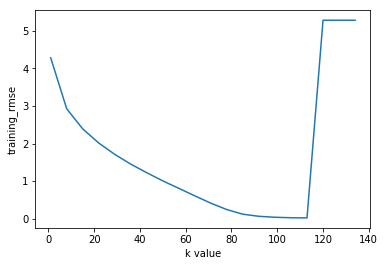

In [62]:
# let's plot training_rmse vs. k  and see if we can observe an elbow. If so, we'll use that k value
x_values = sorted(k_rmses.keys())
y_values = [k_rmses[k] for k in x_values]
plt.plot(x_values, y_values)
plt.xlabel('k value')
plt.ylabel('training_rmse')
plt.show()

### There seems to be an elbow around k ~ 8 which is very interesting

### Because there are also 7 topics observed by eye. No cheating. I promise. I had assigned the topics before k-hunting
~~~~
Even though, this is a biased classification by one human (me), I was simply trying to get a sense of whether my model will be able to detect the number of topics or even get close. Turns out it did!
This makes sense since these ratings are from real raters and the topics are inherent in the data.
~~~~

### This is the simple code I used to assign each joke a topic manually as I read them
~~~~ 
I came up with 7 topics that roughly fit each of the jokes. How amazing!

joke_topics = {}
all_topics = set()
for joke_id, joke in enumerate(jokes,1):
    print joke
    print "choose from ", all_topics, " or make a new topic"
    topic = raw_input("\n")
    if topic not in all_topics:
        all_topics.add(topic.lower())    
    joke_topics[joke_id] = topic
~~~~

In [72]:
joke_id_topics = {1: 'disease', 2: 'sexual', 3: 'racist', 4: 'sexual', 5: 'political', 6: 'political', 7: 'sexual', 8: 'disease', 9: 'other', 10: 'other', 11: 'racist', 12: 'other', 13: 'political', 14: 'sexual', 15: 'racist', 16: 'other', 17: 'sexual', 18: 'other', 19: 'political', 20: 'tech', 21: 'sexual', 22: 'sexual', 23: 'other', 24: 'other', 25: 'sexual', 26: 'sexual', 27: 'political', 28: 'tech', 29: 'sexual', 30: 'political', 31: 'political', 32: 'political', 33: 'racist', 34: 'racist', 35: 'other', 36: 'racist', 37: 'disease', 38: 'other', 39: 'sexual', 40: 'racist', 41: 'other', 42: 'sexual', 43: 'other', 44: 'other', 45: 'religion', 46: 'sexual', 47: 'tech', 48: 'tech', 49: 'tech', 50: 'sexual', 51: 'sexual', 52: 'sexual', 53: 'sexual', 54: 'religion', 55: 'other', 56: 'sexual', 57: 'other', 58: 'other', 59: 'political', 60: 'religion', 61: 'other', 62: 'tech', 63: 'tech', 64: 'disease', 65: 'racist', 66: 'political', 67: 'other', 68: 'tech', 69: 'other', 70: 'other', 71: 'tech', 72: 'sexual', 73: 'political', 74: 'other', 75: 'sexual', 76: 'other', 77: 'political', 78: 'political', 79: 'political', 80: 'political', 81: 'racist', 82: 'tech', 83: 'sexual', 84: 'tech', 85: 'sexual', 86: 'tech', 87: 'other', 88: 'racist', 89: 'political', 90: 'tech', 91: 'other', 92: 'other', 93: 'tech', 94: 'tech', 95: 'other', 96: 'political', 97: 'other', 98: 'sexual', 99: 'other', 100: 'political', 101: 'religion', 102: 'other', 103: 'other', 104: 'tech', 105: 'other', 106: 'tech', 107: 'racist', 108: 'other', 109: 'other', 110: 'other', 111: 'other', 112: 'other', 113: 'other', 114: 'other', 115: 'political', 116: 'tech', 117: 'other', 118: 'other', 119: 'other', 120: 'tech', 121: 'other', 122: 'tech', 123: 'other', 124: 'other', 125: 'other', 126: 'political', 127: 'political', 128: 'political', 129: 'other', 130: 'other', 131: 'other', 132: 'other', 133: 'other', 134: 'other', 135: 'other', 136: 'other', 137: 'other', 138: 'political', 139: 'political', 140: 'other', 141: 'other', 142: 'religion', 143: 'other', 144: 'other', 145: 'other', 146: 'political', 147: 'other', 148: 'other', 149: 'political', 150: 'other'}
print set(joke_id_topics.values())

set(['political', 'disease', 'religion', 'other', 'racist', 'tech', 'sexual'])


## Parameters I tried tweaking overall: ##
* num_factors  -  k dimension of the factorized matrices U, V
* solver   -   'als' or 'sgd'
* max_iterations  -  step iteration
* regularization  -  lmbdas = [0, 1e-16, 1e-14, 1e-12, 1e-10]    `

## Results ##
* found k=8 is a good representation of the real life pattern in this dataset
* solver 'als' performed just as well as 'sgd' with hardly a difference in training_rmse so using 'als' going forward for simplicity's sake
* I tried increasing iterations to a 100 and it made very little difference. In fact you can see from the create report that by iteration 10, the rmse has already levelled out.
* regularization paramater, lambda, dropped very slightly for lambda = 1e-14 but started to climb again as lambda got smaller. I feel comfortable with this learning rate since it is close to the typical 1e-12 and really I was just trying to make sure a particular lambda value doesn't perturb my training_rmse by a lot.


In [69]:
for coeff_topic in rating_recommender.coefficients['joke_id']['factors'][0]:
    print coeff_topic

0.000996696762741
0.000633721589111
-0.00221962947398
0.00583880627528
-0.00405034655705
0.00768231926486
6.64360704832e-05
0.00033010088373


## Does it make sense for a joke to be negative in a topic? 
ehh, not really. So we could use Non-negative Matrix Factorization to get more interpretable results. In practice, NNMF gives very similar results (same topic buckets) but with non-negative coefficients.